In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

In [3]:
train = pd.read_csv('files/train.csv')

## The PassengerId is directly related to the index..

In [4]:
all(train.index == train.PassengerId - 1)

True

# Looking at the data...

## Any missing values?

In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

## Age has missing values. Let's look at it. 

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

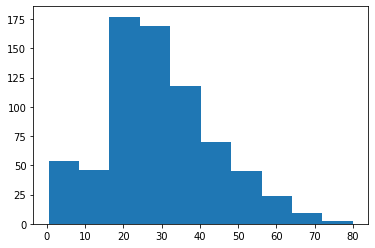

In [7]:
plt.hist(train['Age'])

## The data here is vaguely Gaussian. The choice of the median or mean in this case would offer the 'most common' age, which can be an appropriate choice to fill the missing values. However, it's not a painfully realistic assumption to assume that the missing passenger ages are all the same, so what I'll do instead is give them ages from a normal distribution centered on the 'most common' age.

In [8]:
med = np.nanmedian(train['Age'])
mean = np.nanmean(train['Age'])

In [9]:
nans = train[train.Age.isna()]
nans

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


## I see a lot of Pclass = 3. Is the data missing at random?

(array([ 30.,   0.,   0.,   0.,   0.,  11.,   0.,   0.,   0., 136.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

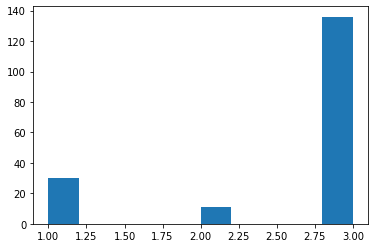

In [10]:
plt.hist(nans['Pclass'])

## It seems the data isn't missing at random, and instead the vast majority of missing ages belong to people with ticket class 3. Since the data isn't missing at random, adding 'fake' ages is probably not worth the effort, as I'd need to make sure the ages I sample from are particularly justified for ticket class 3 peoples' ages, and that would be a smaller subset of values to try and approximate to a normal distribution. I can try and remedy this by taking different cases..

Looking at the titles of the person, the ticket class, the sex, etc, and using the medians/means of all of these to try and ascertain the age.

# Let's look at the data a little bit.

In [11]:
train = train.reset_index(drop = True)

In [12]:
train['PassengerId'] = range(1,len(train.index)+1)
train['Died'] = 1 - train['Survived']

In [13]:
for cols in train.columns:
    print('There are ', len(set(train[cols])), 'unique values for column ', cols)

There are  891 unique values for column  PassengerId
There are  2 unique values for column  Survived
There are  3 unique values for column  Pclass
There are  891 unique values for column  Name
There are  2 unique values for column  Sex
There are  265 unique values for column  Age
There are  7 unique values for column  SibSp
There are  7 unique values for column  Parch
There are  681 unique values for column  Ticket
There are  248 unique values for column  Fare
There are  148 unique values for column  Cabin
There are  4 unique values for column  Embarked
There are  2 unique values for column  Died


# Let's look at the columns without too many unique values, which are likely to be categorical.

0 0 Pclass
0 1 Sex
0 2 SibSp
1 0 Parch
1 1 Embarked
1 2 Fare


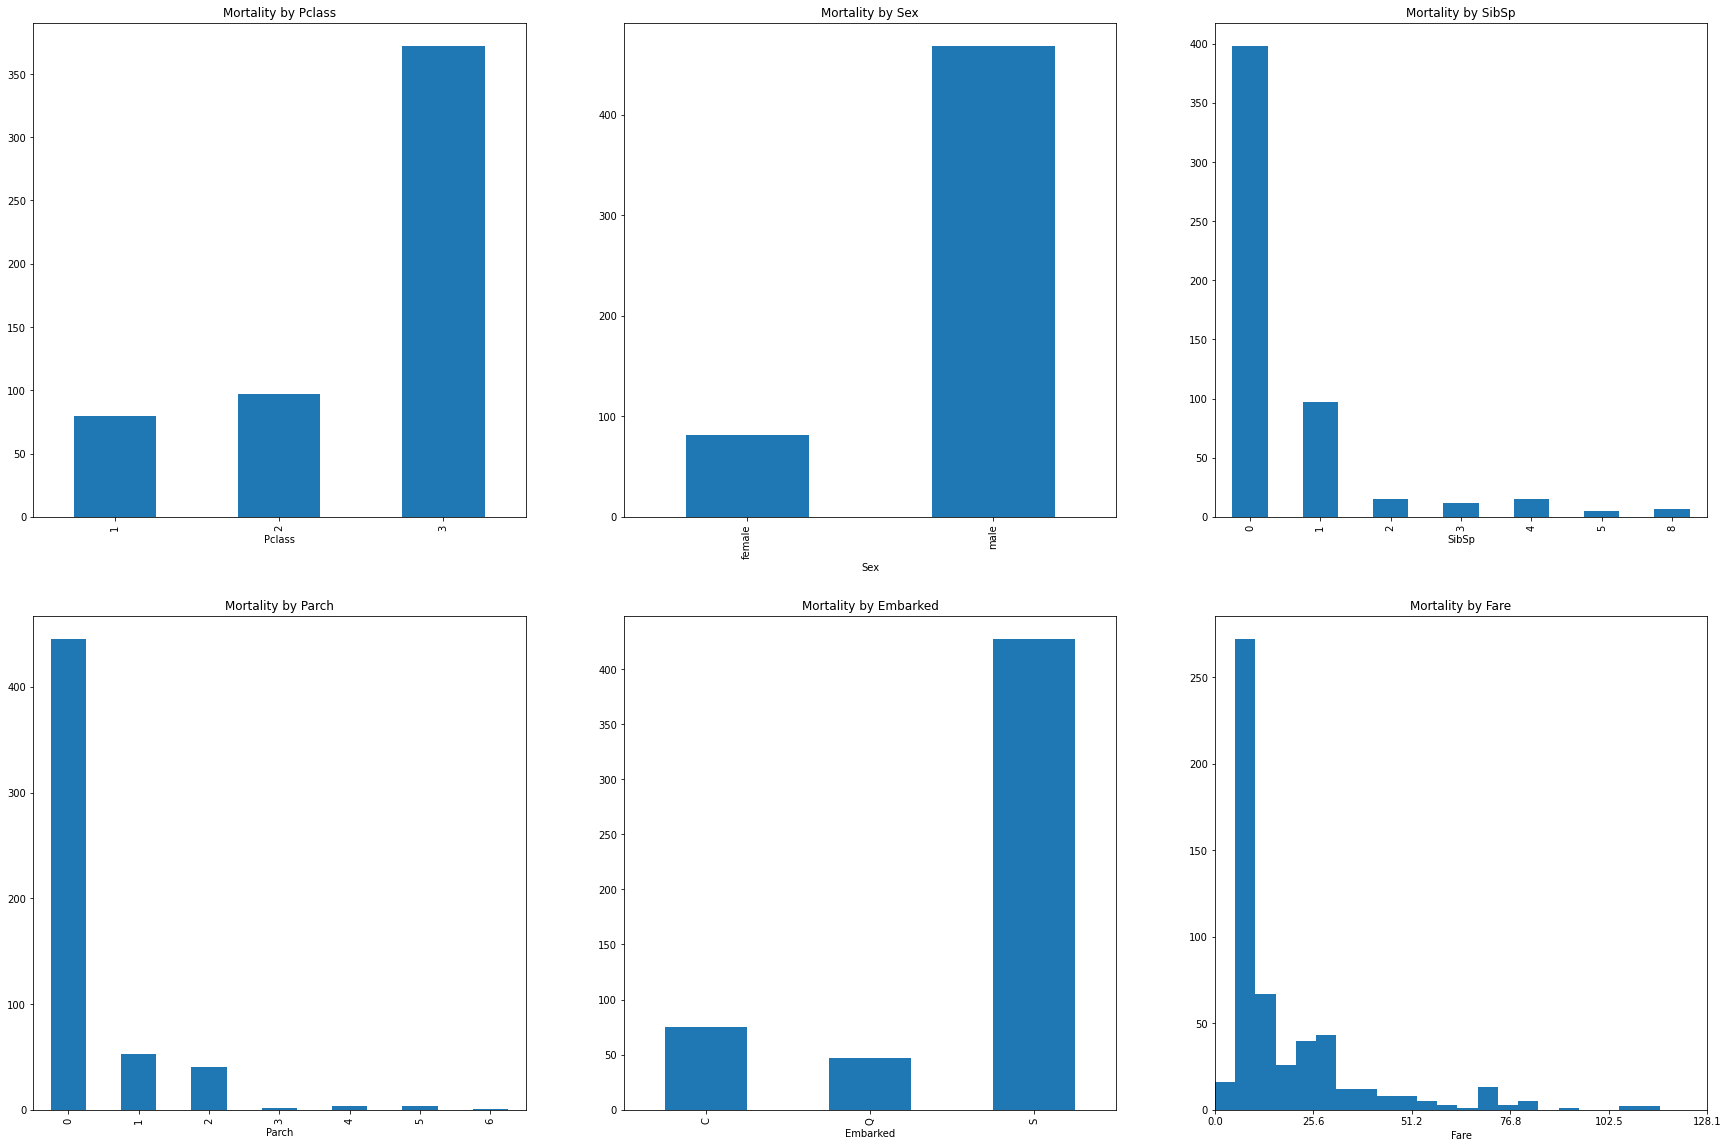

In [14]:
fig, axs = plt.subplots(ncols=3, nrows = 2, figsize=(30, 20))
for fig, i,col in zip([0,0,0,1,1,1],[0,1,2,0,1,2],['Pclass','Sex','SibSp','Parch','Embarked','Fare']):
    print(fig,i,col)
    if col == 'Fare':
        max_fare = np.max(train['Fare'])
        plt.hist(train[train['Survived'] == 0]['Fare'], 
         stacked=True,
         bins = 50)
        plt.xticks([0, 0.05*max_fare, 0.1*max_fare, 0.15*max_fare, 0.2*max_fare, 0.25*max_fare])
        plt.title('Mortality by '+col)
        plt.xlim([0,0.25*max_fare])
        plt.xlabel('Fare')
        plt.show()


    train.groupby(col).sum()['Died'].plot(kind = 'bar', ax = axs[fig][i])
    axs[fig][i].set_title('Mortality by '+col)

    i += 1

## Looking at the plots..
- Clearly ticket class 3 had the most deaths.
- Males died far more often than females.
- People with no siblings or spouses on board were most likely to die. 
- People with no parents or children aboard were most likely to die.
- People who had Southamptom as a port of embarkation were most likely to die.
- People who had a lower ticket fare were more likely to die (I'm not displaying the whole range of the Fare histogram but the whole range keeps this relationship)

In [15]:
train['Family members'] = train['Parch'] + train['SibSp']

<AxesSubplot:xlabel='Family members'>

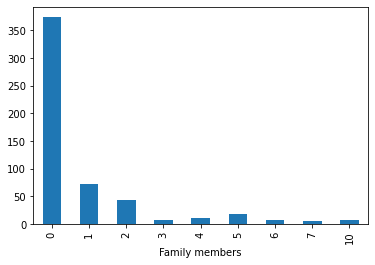

In [16]:
train.groupby('Family members').sum()['Died'].plot(kind = 'bar')

## So, generally speaking, having family members on board seemed to greatly increase a passenger's chance of survival.

# Now, let's work on cleaning the data up, row-by-row.
- Just by looking at its values, Pclass and Embarked should be one-hot encoded.
- It may be worth looking at the titles of passengers, as they're given, and seeing if they could be useful. 
- Using Ticket and Cabin will require a bit of clever thinking to use them properly. We don't have a lot of rows, so one-hot encoding can't be abused too much or our number of dimensions will get too close to our number of datapoints.

# Processing names
## I found a list of honorifics online. I made some functions to clean the names up and test to see if I'm missing any. Any functions I have can be found in the `data_preprocessing` folder.

In [17]:
from data_preprocessing.process_names import append_honorifics

In [19]:
train = append_honorifics(train)

NameError: name 'train' is not defined

In [ ]:
train.iloc[5]

Survived       0.0000
Age           26.0000
SibSp          0.0000
Parch          0.0000
Fare           8.4583
Mr             1.0000
Mrs               NaN
Miss              NaN
Master            NaN
Don               NaN
Rev               NaN
Dr                NaN
Mme               NaN
Ms                NaN
Major             NaN
Lady              NaN
Sir               NaN
Mlle              NaN
Col               NaN
Capt              NaN
Countess          NaN
Sex_female     0.0000
Sex_male       1.0000
Pclass_1       0.0000
Pclass_2       0.0000
Pclass_3       1.0000
Embarked_C     0.0000
Embarked_Q     1.0000
Embarked_S     0.0000
Name: 5, dtype: float64

## It looks like there're a few weird honorifics. I'll add them and check again.

## Looks like the list is good now. I'm now going to append these honorifics to the dataset.

In [ ]:
train = train.drop(columns = ['Died', 'Family members'])

# Dealing with missing ages

## My way with dealing with the nan ages was as follows:

- I needed to treat the missing values with care, because they didn't seem to be missing randomly -- most of the ones missing had a ticket class of 3, for example
- Therefore, take identifying passenger information (gender, ticket class and title), and take a subset of the dataset with passengers who also share those attributes
- Take the mean or median age of that population. The choice of the mean or median will come down to using the mean if the distribution passes a normality test with alpha = 1e-3, and the median otherwise. If there are too few samples with which to take a normality test for the population, see how close the mean and median are. If they're close, within 10% of eachother, just take the mean. If not, take the median since that usually implies the histogram is skewed.

With every couple of iterations I'll show an age histogram of the relevant population the person who's age is NaN.

Changing  nan to  26 for  male with pclass  3 and title  Mr
Changing  nan to  31 for  male with pclass  2 and title  Mr
Changing  nan to  34 for  female with pclass  3 and title  Mrs
Changing  nan to  26 for  male with pclass  3 and title  Mr
Changing  nan to  16 for  female with pclass  3 and title  Miss
Changing  nan to  26 for  male with pclass  3 and title  Mr
Changing  nan to  41 for  female with pclass  1 and title  Mrs
Changing  nan to  16 for  female with pclass  3 and title  Miss
Changing  nan to  26 for  male with pclass  3 and title  Mr
Changing  nan to  26 for  male with pclass  3 and title  Mr
Changing  nan to  26 for  male with pclass  3 and title  Mr
Changing  nan to  26 for  male with pclass  3 and title  Mr
Changing  nan to  16 for  female with pclass  3 and title  Miss
Changing  nan to  26 for  male with pclass  3 and title  Mr
Changing  nan to  42 for  male with pclass  1 and title  Mr
Changing  nan to  42 for  male with pclass  1 and title  Mr
Changing  nan to  5 fo

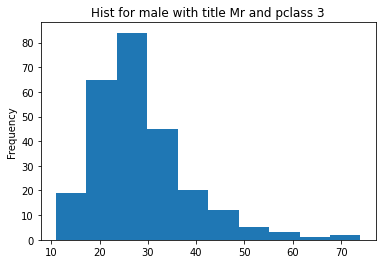

Changing  nan to  26 for  male with pclass  3 and title  Mr
Changing  nan to  34 for  female with pclass  3 and title  Mrs
Changing  nan to  42 for  male with pclass  1 and title  Mr
Changing  nan to  26 for  male with pclass  3 and title  Mr
Changing  nan to  16 for  female with pclass  3 and title  Miss
Changing  nan to  16 for  female with pclass  3 and title  Miss
Changing  nan to  26 for  male with pclass  3 and title  Mr
Changing  nan to  34 for  female with pclass  3 and title  Mrs
Changing  nan to  16 for  female with pclass  3 and title  Miss
Changing  nan to  41 for  female with pclass  1 and title  Mrs
Changing  nan to  26 for  male with pclass  3 and title  Mr
Changing  nan to  26 for  male with pclass  3 and title  Mr
Changing  nan to  16 for  female with pclass  3 and title  Miss
Changing  nan to  26 for  male with pclass  3 and title  Mr
Changing  nan to  26 for  male with pclass  3 and title  Mr
Changing  nan to  31 for  male with pclass  2 and title  Mr
Changing  nan t

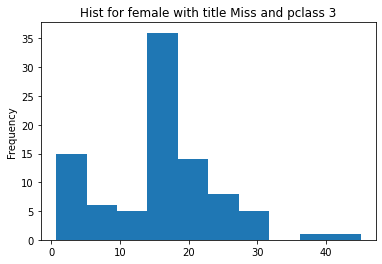

Changing  nan to  16 for  female with pclass  3 and title  Miss
Changing  nan to  26 for  male with pclass  3 and title  Mr


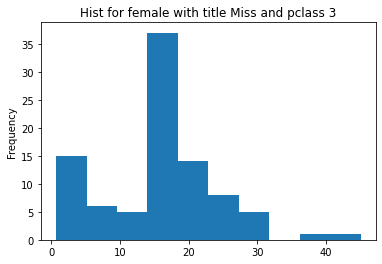

Changing  nan to  16 for  female with pclass  3 and title  Miss
Changing  nan to  34 for  female with pclass  3 and title  Mrs
Changing  nan to  26 for  male with pclass  3 and title  Mr
Changing  nan to  26 for  male with pclass  3 and title  Mr
Changing  nan to  16 for  female with pclass  3 and title  Miss
Changing  nan to  22 for  female with pclass  2 and title  Miss
Changing  nan to  26 for  male with pclass  3 and title  Mr
Changing  nan to  26 for  male with pclass  3 and title  Mr
Changing  nan to  42 for  male with pclass  1 and title  Mr


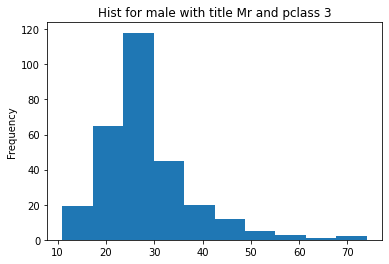

Changing  nan to  26 for  male with pclass  3 and title  Mr
Changing  nan to  16 for  female with pclass  3 and title  Miss
Changing  nan to  26 for  male with pclass  3 and title  Mr
Changing  nan to  26 for  male with pclass  3 and title  Mr


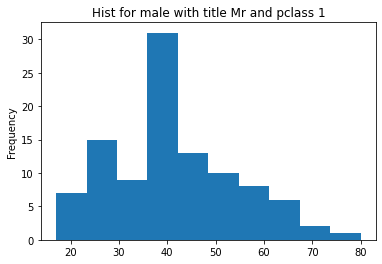

Changing  nan to  42 for  male with pclass  1 and title  Mr
Changing  nan to  26 for  male with pclass  3 and title  Mr
Changing  nan to  26 for  male with pclass  3 and title  Mr
Changing  nan to  26 for  male with pclass  3 and title  Mr
Changing  nan to  26 for  male with pclass  3 and title  Mr
Changing  nan to  16 for  female with pclass  3 and title  Miss
Changing  nan to  26 for  male with pclass  3 and title  Mr
Changing  nan to  26 for  male with pclass  3 and title  Mr
Changing  nan to  41 for  female with pclass  1 and title  Mrs
Changing  nan to  31 for  male with pclass  2 and title  Mr
Changing  nan to  16 for  female with pclass  3 and title  Miss
Changing  nan to  26 for  male with pclass  3 and title  Mr
Changing  nan to  16 for  female with pclass  3 and title  Miss
Changing  nan to  5 for  male with pclass  3 and title  Master
Changing  nan to  42 for  male with pclass  1 and title  Mr
Changing  nan to  26 for  male with pclass  3 and title  Mr
Changing  nan to  16 f

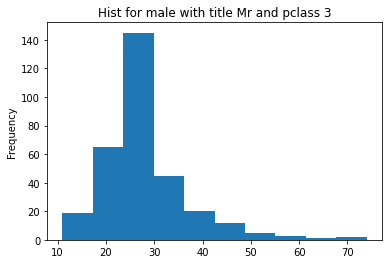

Changing  nan to  26 for  male with pclass  3 and title  Mr
Changing  nan to  26 for  male with pclass  3 and title  Mr
Changing  nan to  16 for  female with pclass  3 and title  Miss


In [ ]:
from data_preprocessing.fill_in_ages import fill_in_nan_ages

train = fill_in_nan_ages(train)

## And to check that we have no more missing age values..

In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Mr,Mrs,Miss,...,Dr,Mme,Ms,Major,Lady,Sir,Mlle,Col,Capt,Countess
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,518.0,129.0,182.0,...,7.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0
mean,446.000000,0.383838,2.308642,29.138238,0.523008,0.381594,32.204208,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
std,257.353842,0.486592,0.836071,13.596951,1.102743,0.806057,49.693429,0.0,0.0,0.0,...,0.0,NaN,NaN,0.0,NaN,NaN,0.0,0.0,NaN,NaN
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,223.500000,0.000000,2.000000,21.000000,0.000000,0.000000,7.910400,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
75%,668.500000,1.000000,3.000000,36.750000,1.000000,0.000000,31.000000,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


## Dealing with Ticket and Cabin

In [ ]:
train.Cabin.isna().sum()

687

Ticket and Cabin are very unwieldy columns. There are some resources online saying Ticket has meaning, but I'd then have to think about how I'd deal with the data -- it couldn't be considered categorical. I'm going to elect to discard it.

Cabin, meanwhile, has most of its values a NaN, so I'm going to drop it, as I couldn't really justify filling those NaNs with something. I'm also going to drop Died, because I'm not using it anymore. I'm also going to drop PassengerId because it's redundant.

In [ ]:
train = train.drop(columns = ['Ticket','Cabin', 'PassengerId', 'Name','title'])

## Now to one-hot encode the obvious columns: Sex, Pclass and Embarked.

In [ ]:
train=pd.get_dummies(train, columns = ['Sex', 'Pclass','Embarked'])

## Here's how the data looks now.

In [ ]:
train

,Survived,Age,SibSp,Parch,Fare,Mr,Mrs,Miss,Master,Don,...,Capt,Countess,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0,1,0,0,1,0,0,1
1,1,38.0,1,0,71.2833,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,1,0,1,0,0,1,0,0
2,1,26.0,0,0,7.9250,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,1,0,0,0,1,0,0,1
3,1,35.0,1,0,53.1000,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,1,0,1,0,0,0,0,1
4,0,35.0,0,0,8.0500,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,0,13.0000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,1,0,1,0,0,0,1
887,1,19.0,0,0,30.0000,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,1,0,1,0,0,0,0,1
888,0,16.0,1,2,23.4500,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,1,0,0,0,1,0,0,1
889,1,26.0,0,0,30.0000,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0,1,1,0,0,1,0,0


## Now to check for any other NaN values anywhere...

In [ ]:
train.isnull().sum().sum()

13361

## I'm going to use a random forest classifier, so I will elect to not scale the Age, Fare, SibSp, and Parch columns.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

